# Transmission at LGS channel

In [1]:
import numpy as np
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from arte.photometry.morfeo_transmissive_systems import MorfeoLgsChannelTransmissiveSystem_001, \
    MorfeoLgsChannelTransmissiveSystem_002, MorfeoLgsChannelTransmissiveSystem_003
from arte.photometry.transmissive_elements_catalogs import MorfeoTransmissiveElementsCatalog, \
    GlassesTransmissiveElementsCatalog, CoatingsTransmissiveElementsCatalog, \
    DetectorsTransmissiveElementsCatalog

## Correcting (Schmidt) Plate

[5900.] Angstrom
[0.93721327]


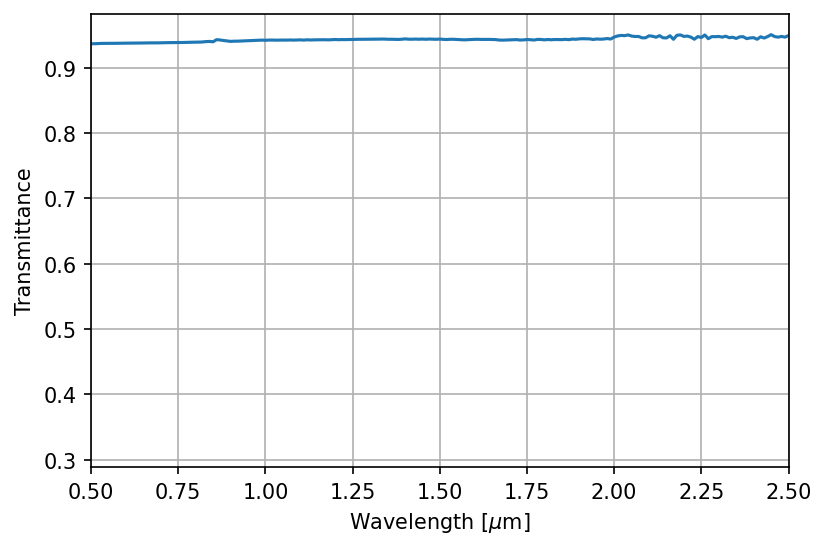

In [2]:
schmidt_plate = MorfeoTransmissiveElementsCatalog.schmidt_plate_001()
mpl.rcParams['figure.dpi'] = 150
schmidt_plate.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = schmidt_plate.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(schmidt_plate.transmittance(wv[id_589nm]))

[5900.] Angstrom
[0.99920028]


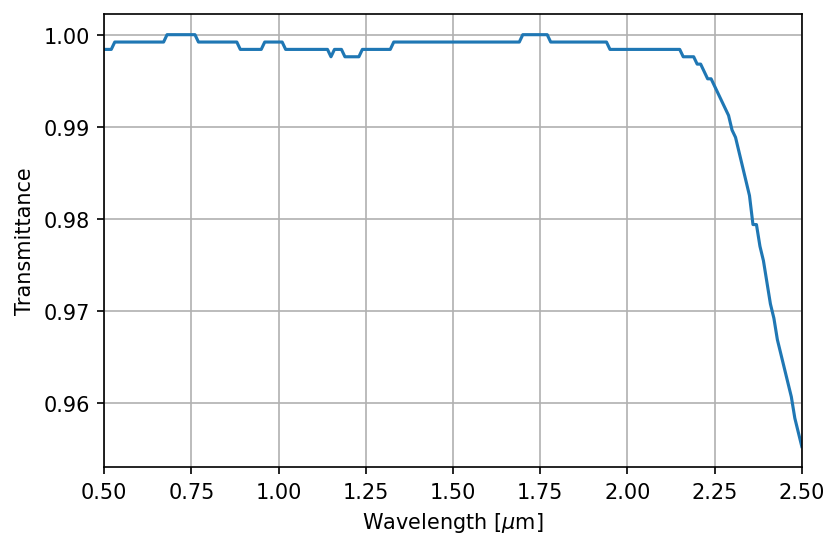

In [3]:
supra_80mm = GlassesTransmissiveElementsCatalog.suprasil3002_80mm_internal_001()
mpl.rcParams['figure.dpi'] = 150
supra_80mm.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = supra_80mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra_80mm.transmittance(wv[id_589nm]))

## Dichroic

[5900.] Angstrom
[0.95]


  points: [3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900.
 5000. 5100. 5200. 5300. 5400. 5500.]
  lookup_table: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16] [synphot.models]


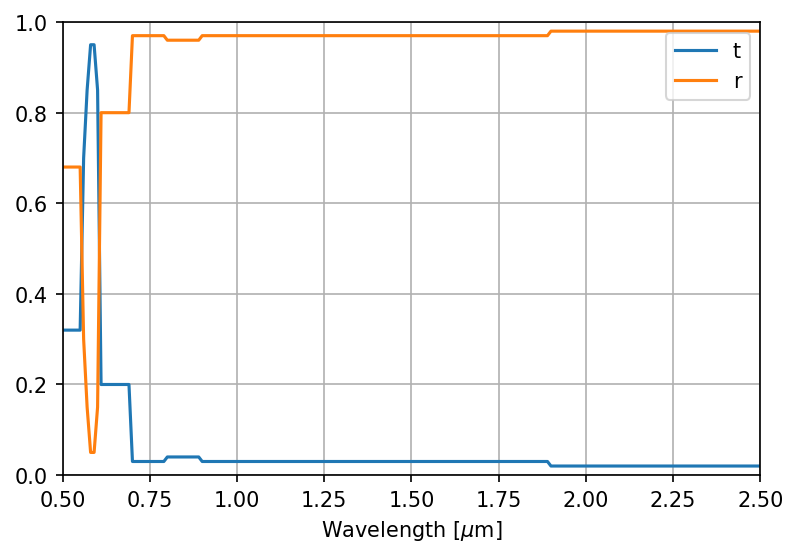

In [4]:
#First surface (MATERION-like average) of dichroic
materion = CoatingsTransmissiveElementsCatalog.materion_average_001()
mpl.rcParams['figure.dpi'] = 150
materion.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')

materion.plot(transmittance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('')
plt.xlim(0.5, 2.5)
plt.ylim(0, 1)

wv = materion.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(materion.transmittance(wv[id_589nm]))

[0.99500625]


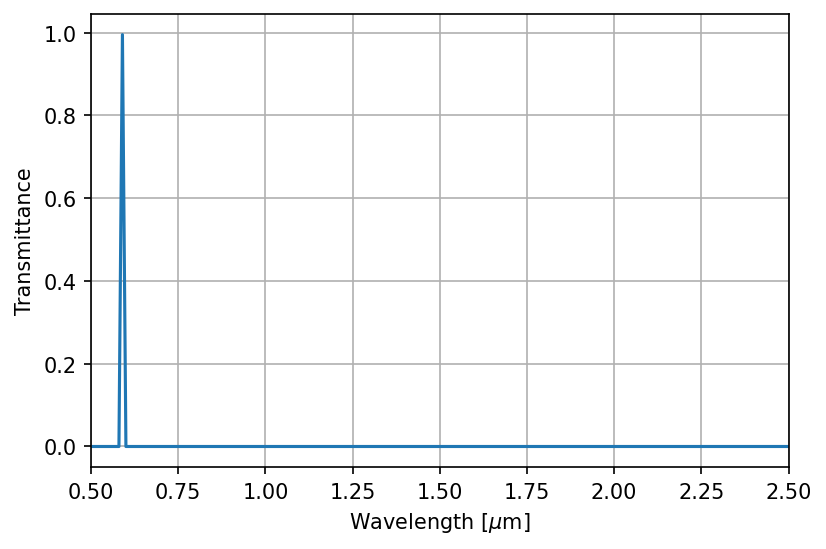

In [5]:
#Second surface of the LGS dichroic. 
ar_coating = CoatingsTransmissiveElementsCatalog.ar_coating_589nm_001()
ar_coating.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)
wv = ar_coating.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(ar_coating.transmittance(wv[id_589nm]))

[0.99915032]


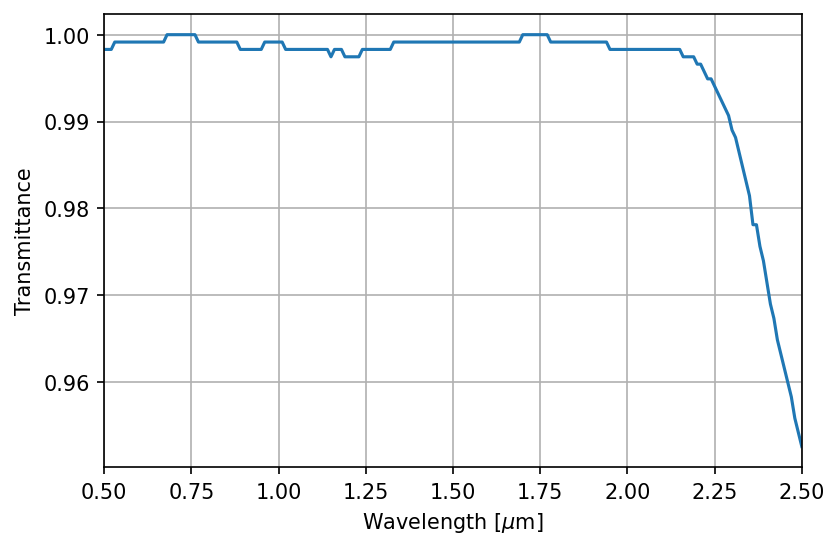

In [6]:
#Substrate = Suprasil3002 85 mm.
suprasil85mm = GlassesTransmissiveElementsCatalog.suprasil3002_85mm_internal_001()
suprasil85mm.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)
wv = suprasil85mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(suprasil85mm.transmittance(wv[id_589nm]))

  points: [3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900.
 5000. 5100. 5200. 5300. 5400. 5500.]
  lookup_table: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16] [synphot.models]


[5900.] Angstrom
[0.94445277]


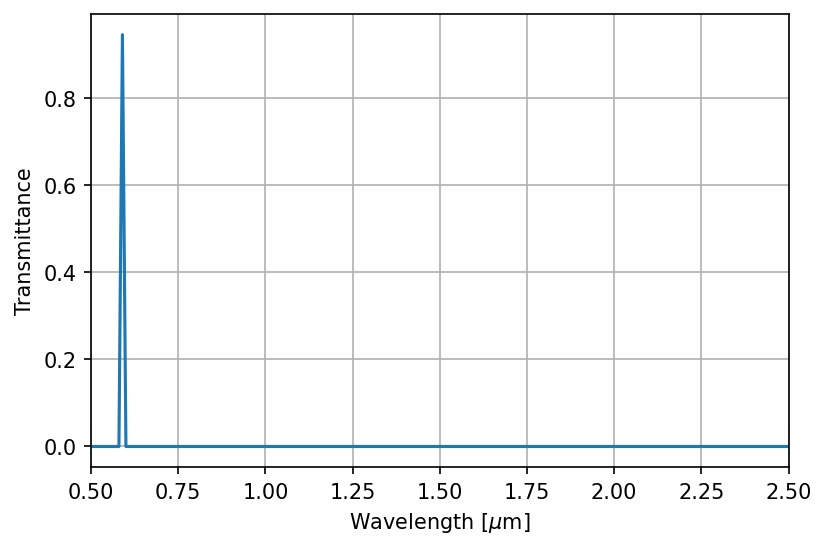

In [7]:
#Overall transmittance
lgs_dichroic = MorfeoTransmissiveElementsCatalog.lgs_dichroic_002()
lgs_dichroic.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)
# plt.ylim(0, 1)

print(wv[id_589nm])
print(lgs_dichroic.transmittance(wv[id_589nm]))

## LGSO folding mirror

[5900.] Angstrom
[0.99]


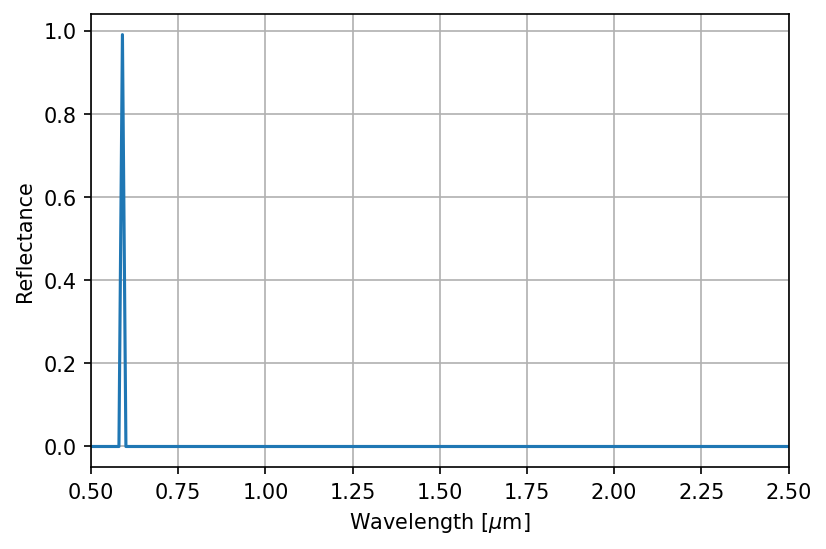

In [8]:
lgso_fm = MorfeoTransmissiveElementsCatalog.lgso_fm_001()
mpl.rcParams['figure.dpi'] = 150
lgso_fm.plot(transmittance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Reflectance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_fm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_fm.reflectance(wv[id_589nm]))

## LGSO lenses

[5900.] Angstrom
[0.99892053]
[5900.] Angstrom
[0.98896872]


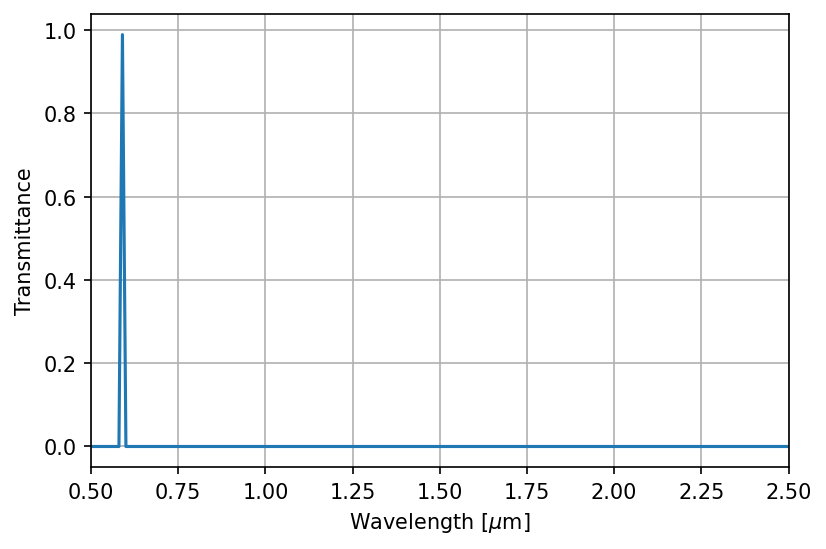

In [9]:
supra108mm = GlassesTransmissiveElementsCatalog.suprasil3002_108mm_internal_001()
wv = supra108mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra108mm.transmittance(wv[id_589nm]))

lgso_l1 = MorfeoTransmissiveElementsCatalog.lgso_lens1_001()
mpl.rcParams['figure.dpi'] = 150
lgso_l1.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_l1.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_l1.transmittance(wv[id_589nm]))

[5900.] Angstrom
[0.99930021]
[5900.] Angstrom
[0.98934462]


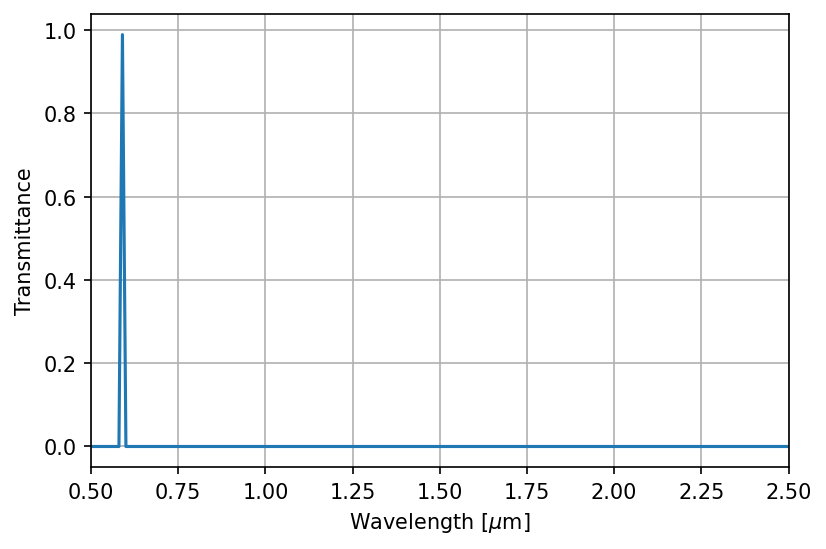

In [10]:
supra70mm = GlassesTransmissiveElementsCatalog.suprasil3002_70mm_internal_001()
wv = supra70mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra70mm.transmittance(wv[id_589nm]))

lgso_l2 = MorfeoTransmissiveElementsCatalog.lgso_lens2_001()
mpl.rcParams['figure.dpi'] = 150
lgso_l2.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_l2.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_l2.transmittance(wv[id_589nm]))

[5900.] Angstrom
[0.99960006]
[5900.] Angstrom
[0.98964148]


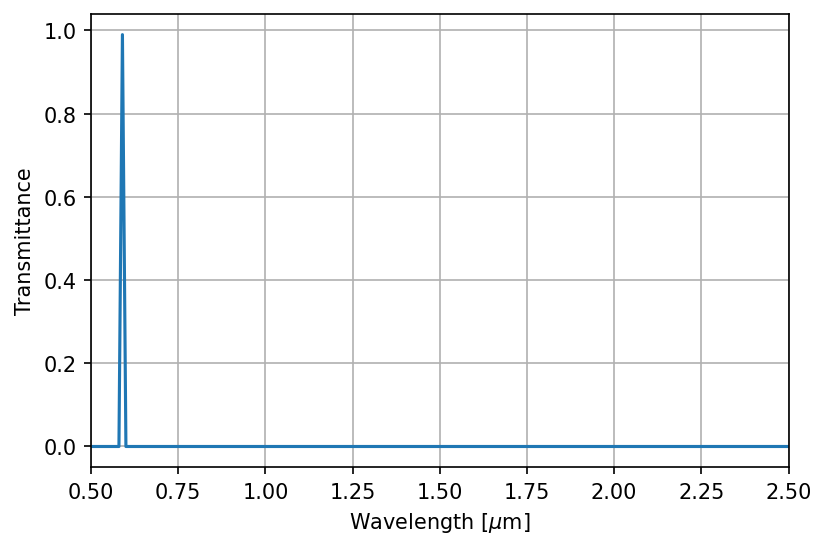

In [11]:
supra40mm = GlassesTransmissiveElementsCatalog.suprasil3002_40mm_internal_001()
wv = supra40mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra40mm.transmittance(wv[id_589nm]))

lgso_l3 = MorfeoTransmissiveElementsCatalog.lgso_lens3_001()
mpl.rcParams['figure.dpi'] = 150
lgso_l3.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_l3.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_l3.transmittance(wv[id_589nm]))

[5900.] Angstrom
[0.99940015]
[5900.] Angstrom
[0.98944356]


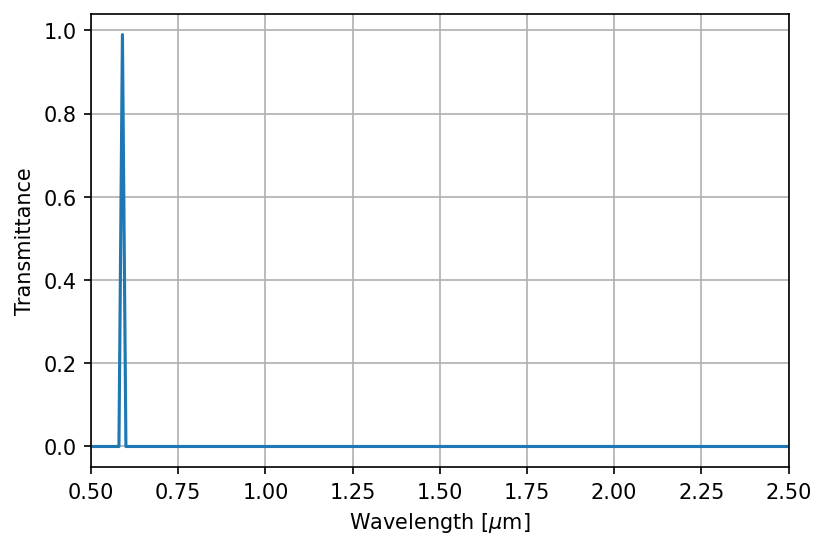

In [12]:
supra60mm = GlassesTransmissiveElementsCatalog.suprasil3002_60mm_internal_001()
wv = supra60mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra60mm.transmittance(wv[id_589nm]))

lgso_l4 = MorfeoTransmissiveElementsCatalog.lgso_lens4_001()
mpl.rcParams['figure.dpi'] = 150
lgso_l4.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_l4.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_l4.transmittance(wv[id_589nm]))

## LGS WFS

Collimator Module + Detector Module. Camera and detector windows are not considered.

[5890.] Angstrom
[0.8092472]


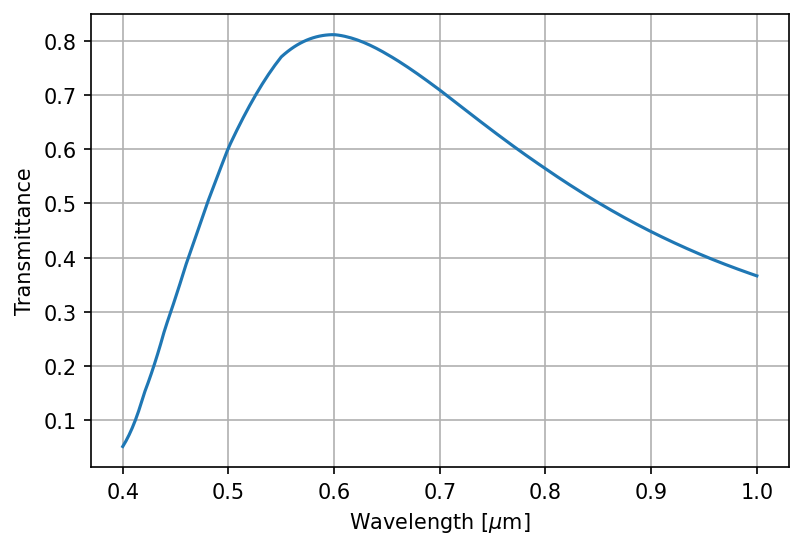

In [13]:
lgs_wfs = MorfeoTransmissiveElementsCatalog.lgs_wfs_001()
mpl.rcParams['figure.dpi'] = 150
lgs_wfs.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)

wv = lgs_wfs.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgs_wfs.transmittance(wv[id_589nm]))

## Detector
C-Blue camera QE. It includes camera and detector windows.

[5880.        5880.0000001 5900.        5900.0000001] Angstrom
[0.  0.7 0.7 0. ]
[  2000.          5880.          5880.0000001   5900.
   5900.0000001 100000.       ] Angstrom


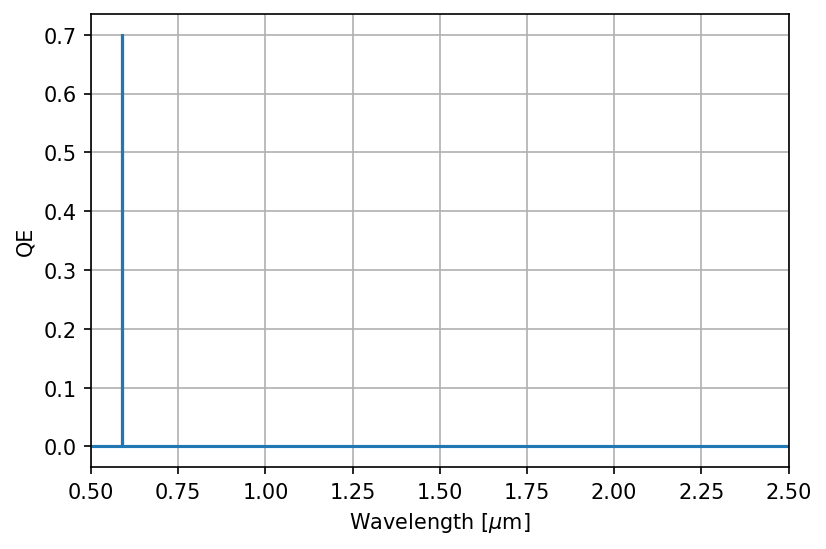

In [14]:
lgs_det = DetectorsTransmissiveElementsCatalog.c_blue_qe_001()
mpl.rcParams['figure.dpi'] = 150
lgs_det.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('QE')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgs_det.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgs_det.transmittance(wv[id_589nm]))
print(wv)

## Throughput of LGS WFS

  points: [3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900.
 5000. 5100. 5200. 5300. 5400. 5500.]
  lookup_table: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16 -1.11022302e-16
 -1.11022302e-16 -1.11022302e-16] [synphot.models]


Throughput at 589 nm: 0.24185471244576406


(0.5, 2.5)

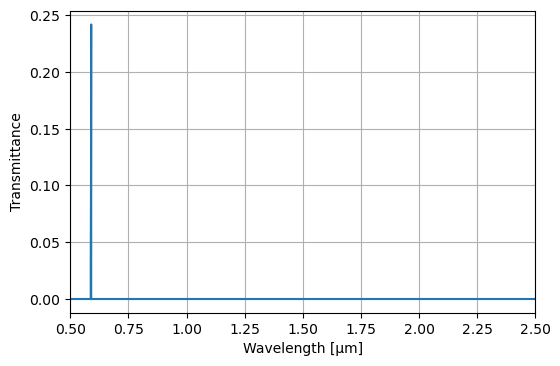

In [15]:
lgs_ch = MorfeoLgsChannelTransmissiveSystem_003()
waveset = lgs_ch.transmittance.waveset
transmittance = lgs_ch.transmittance(waveset)
nu_max_t = np.argmax(transmittance)
print('Throughput at 589 nm: %s' %transmittance.max())

mpl.rcParams['figure.dpi'] = 100
plt.plot(waveset.to(u.um), transmittance)
plt.grid()
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.xlim(0.5, 2.5)

0.5267810387760798
0.5267810387760798


(5000.0, 25000.0)

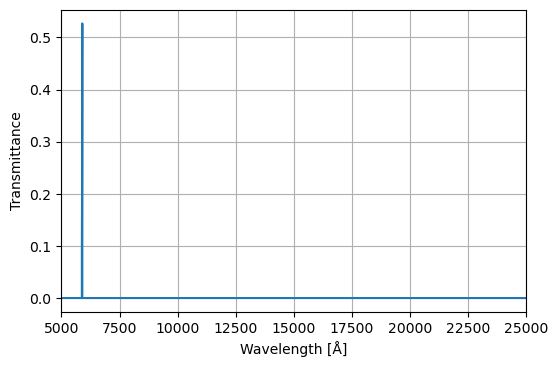

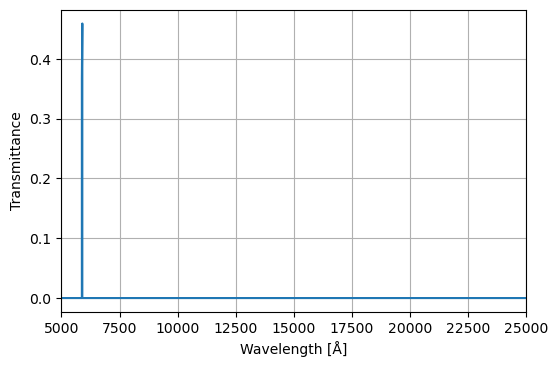

In [17]:
tr_from_m1_to_lgs_dich = lgs_ch.transmittance_from_to(0, 12)(lgs_ch.transmittance.waveset)

tr_from_lgso_to_det = lgs_ch.transmittance_from_to(12, 24)(lgs_ch.transmittance.waveset)
print(tr_from_lgso_to_det.max())

tr_from_lgso_to_wfs = lgs_ch.transmittance_from_to(12, 22)(lgs_ch.transmittance.waveset)
print(tr_from_lgso_to_wfs.max())

plt.plot(lgs_ch.transmittance.waveset, lgs_ch.transmittance_from_to(12, 23)(lgs_ch.transmittance.waveset))
plt.grid()
plt.xlabel('Wavelength [Å]')
plt.ylabel('Transmittance')
plt.xlim(5000, 25000)

plt.figure()
plt.plot(lgs_ch.transmittance.waveset, tr_from_m1_to_lgs_dich)
plt.grid()
plt.xlabel('Wavelength [Å]')
plt.ylabel('Transmittance')
plt.xlim(5000, 25000)

# Transmission at LO channel

In [18]:
import numpy as np
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from arte.photometry.morfeo_transmissive_systems import MorfeoLowOrderChannelTransmissiveSystem_001
from arte.photometry.transmissive_elements_catalogs import MorfeoTransmissiveElementsCatalog, \
    GlassesTransmissiveElementsCatalog, CoatingsTransmissiveElementsCatalog, \
    DetectorsTransmissiveElementsCatalog

Text(0, 0.5, 'QE')

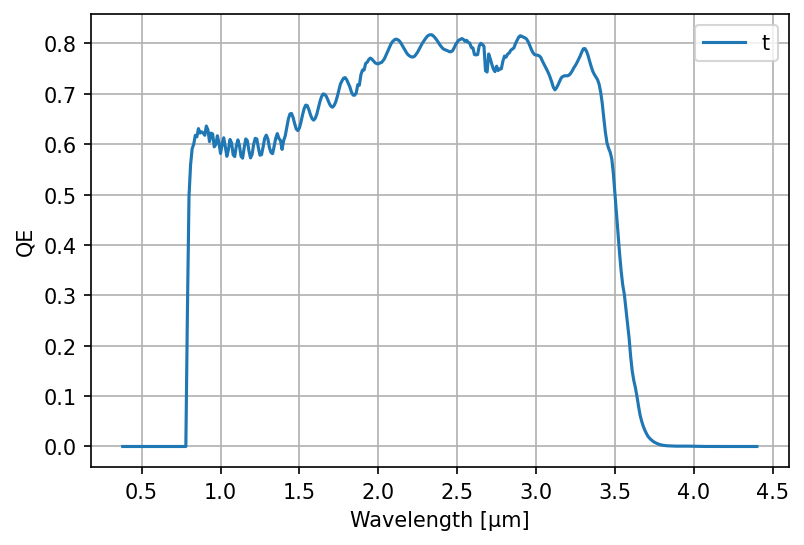

In [19]:
c_red1_qe = DetectorsTransmissiveElementsCatalog.c_red_one_qe_001()

mpl.rcParams['figure.dpi'] = 150
c_red1_qe.plot(reflectance=None, absorptance=None, wv_unit=u.um)
plt.xlabel('Wavelength [μm]')
plt.ylabel('QE')

(0.0, 44000.0)

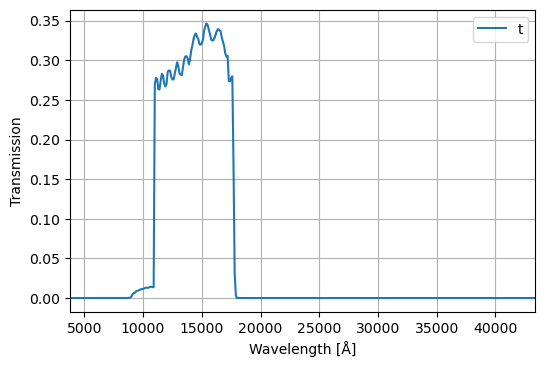

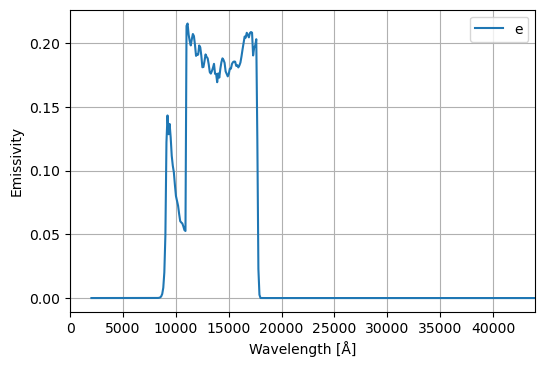

In [20]:
lo_ch = MorfeoLowOrderChannelTransmissiveSystem_001()

mpl.rcParams['figure.dpi'] = 100
lo_ch.plot(absorptance=False)
plt.xlabel('Wavelength [Å]')
plt.ylabel('Transmission')
plt.xlim(3800,43400)

plt.figure()
lo_ch.plot(transmittance=False)
plt.xlabel('Wavelength [Å]')
plt.ylabel('Emissivity')
plt.legend('e')
plt.xlim(0,44000)

In [21]:
wv_lo = lo_ch.as_transmissive_element().waveset
lo_transm = lo_ch.as_transmissive_element().transmittance(wv_lo)
wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um

id_H_min = np.argwhere(wv_lo==wv_H_min.to(u.Angstrom))[0][0]
id_H_max = np.argwhere(wv_lo==wv_H_max.to(u.Angstrom))[0][0]
transm_H = lo_transm[id_H_min:id_H_max]
print('H band average transmission: %s' %np.mean(transm_H))

H band average transmission: 0.29853651211442367


In [22]:
wv_J_min = 1. * u.um
wv_J_max = 1.4 * u.um

id_J_min = np.argwhere(wv_lo==wv_J_min.to(u.Angstrom))[0][0]
id_J_max = np.argwhere(wv_lo==wv_J_max.to(u.Angstrom))[0][0]
print(wv_lo[id_J_min])
print(wv_lo[id_J_max])

transm_J = lo_transm[id_J_min:id_J_max]
print('J band average transmission: %s' %np.mean(transm_J))

9999.999999999998 Angstrom
13999.999999999996 Angstrom
J band average transmission: 0.19447155967113916


In [23]:
wv_HJ_min = 1. * u.um
wv_HJ_max = 1.8 * u.um

id_HJ_min = np.argwhere(wv_lo==wv_HJ_min.to(u.Angstrom))[0][0]
id_HJ_max = np.argwhere(wv_lo==wv_HJ_max.to(u.Angstrom))[0][0]
print(wv_lo[id_HJ_min])
print(wv_lo[id_HJ_max])

transm_HJ = lo_transm[id_HJ_min:id_HJ_max]
print('H+J band average transmission: %s' %np.mean(transm_HJ))

9999.999999999998 Angstrom
17999.999999999996 Angstrom
H+J band average transmission: 0.25219120648278104


# Transmission at Reference channel

In [24]:
from arte.photometry.morfeo_transmissive_systems import MorfeoReferenceChannelTransmissiveSystem_001

(0.0, 15000.0)

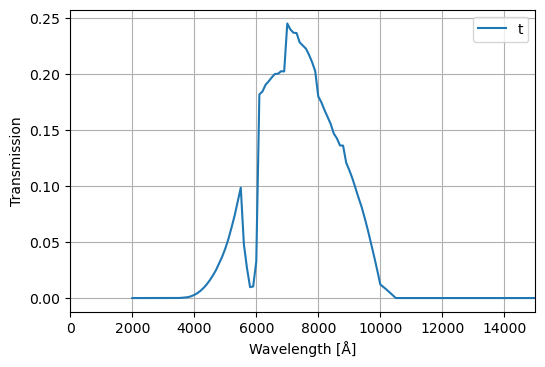

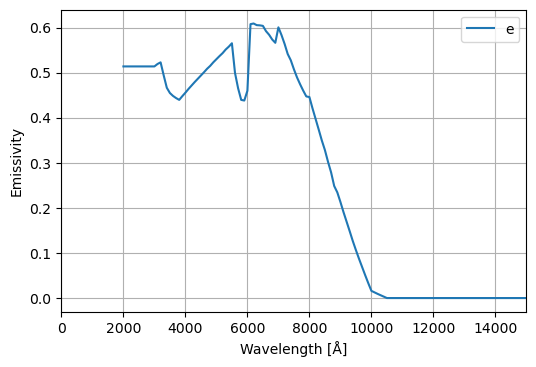

In [25]:
r_ch = MorfeoReferenceChannelTransmissiveSystem_001()

mpl.rcParams['figure.dpi'] = 100
r_ch.plot(absorptance=False)
plt.xlabel('Wavelength [Å]')
plt.ylabel('Transmission')
plt.xlim(0,15000)

plt.figure()
r_ch.plot(transmittance=False)
plt.xlabel('Wavelength [Å]')
plt.ylabel('Emissivity')
plt.legend('e')
plt.xlim(0,15000)

In [26]:
wv_r = r_ch.as_transmissive_element().waveset
r_transm = r_ch.as_transmissive_element().transmittance(wv_r)
wv_min = 0.6 * u.um
wv_max = 1. * u.um

id_min = np.argwhere(wv_r==wv_min.to(u.Angstrom))[0][0]
id_max = np.argwhere(wv_r==wv_max.to(u.Angstrom))[0][0]
transm_ref = r_transm[id_min:id_max]
print('R+I band average transmission: %s' %np.mean(transm_ref))

R+I band average transmission: 0.1435285662997691
